<a href="https://colab.research.google.com/github/honeydewsago/IndividualProject_Admin/blob/main/MobileNetV2Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/herb_images/train'
val_dir = '/content/drive/MyDrive/herb_images/val'
test_dir = '/content/drive/MyDrive/herb_images/test'

In [4]:
import os

print("Files in train directory:")
print(os.listdir(train_dir))

print("Files in validation directory:")
print(os.listdir(val_dir))

print("Files in test directory:")
print(os.listdir(test_dir))

Files in train directory:
['chongcao', 'baihe', 'fuling', 'aiye', 'dangshen', 'huangbai', 'gancao', 'huangqi', 'gouqi', 'jinyinhua', 'shanyao', 'luohanguo', 'renshen', 'tiannanxing', 'heshouwu']
Files in validation directory:
['huangqi', 'dangshen', 'chongcao', 'heshouwu', 'gouqi', 'huangbai', 'gancao', 'fuling', 'aiye', 'baihe', 'luohanguo', 'shanyao', 'jinyinhua', 'tiannanxing', 'renshen']
Files in test directory:
['gancao', 'fuling', 'heshouwu', 'baihe', 'aiye', 'chongcao', 'gouqi', 'huangqi', 'huangbai', 'dangshen', 'renshen', 'shanyao', 'jinyinhua', 'luohanguo', 'tiannanxing']


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with preprocessing and augmentation options
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,            # Normalize pixel values
    rotation_range=20,            # Random rotation up to 20 degrees
    width_shift_range=0.2,        # Random horizontal shift
    height_shift_range=0.2,       # Random vertical shift
    shear_range=0.2,              # Shear transformations
    zoom_range=0.2,               # Random zoom-in or zoom-out
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest',          # Fill mode for pixel values outside the boundaries
    brightness_range=[0.7, 1.3],  # Random image brightness adjustment
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create data generators
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

Found 3000 images belonging to 15 classes.
Found 375 images belonging to 15 classes.
Found 375 images belonging to 15 classes.


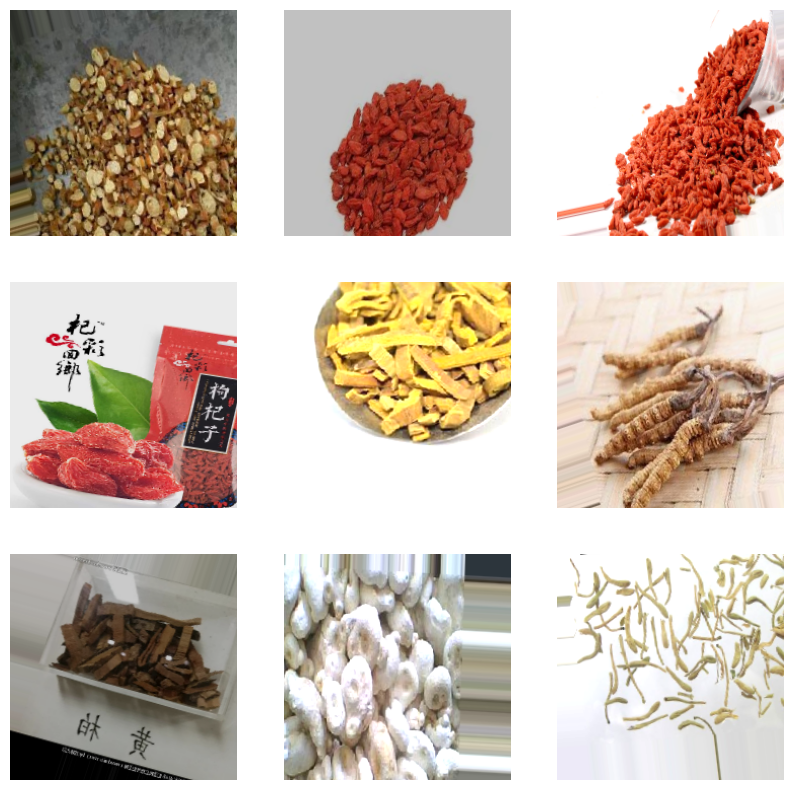

In [7]:
# Visualize preprocessed images
import matplotlib.pyplot as plt

sample_images, _ = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define batch size and epochs to train the model
batch_size = 32
epochs = 10

print(f"Training with batch_size={batch_size}, epochs={epochs}")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Training with batch_size=32, epochs=10
Epoch 1/10
93/93 [==============================] - 87s 814ms/step - loss: 0.7275 - accuracy: 0.7837 - val_loss: 0.2969 - val_accuracy: 0.9034
Epoch 2/10
93/93 [==============================] - 65s 695ms/step - loss: 0.3189 - accuracy: 0.8949 - val_loss: 0.3875 - val_accuracy: 0.8778
Epoch 3/10
93/93 [==============================] - 62s 669ms/step - loss: 0.2664 - accuracy: 0.9144 - val_loss: 0.2610 - val_accuracy: 0.9148
Epoch 4/10
93/93 [==============================] - 65s 698ms/step - loss: 0.2170 - accuracy: 0.9262 - val_loss: 0.2250 - val_accuracy: 0.9261
Epoch 5/10
93/93 [==============================] - 64s 688ms/step - loss: 0.1764 - accuracy: 0.9461 - val_loss: 0.2640 - val_accuracy: 0.9119
Epoch 6/10
93/93 [==============================] - 61s 662ms/step - loss: 0.1409 - accuracy: 0.9542 - val_loss: 0.2453 - val_accuracy: 0.9205
Epoch 7/10
93/93 [==============================] - 62s 667ms/step - loss: 0.1535 - accuracy: 0.9481 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy for batch_size={batch_size}, epochs={epochs}: {test_accuracy}")
print(f"Test loss: {test_loss}")

 5/12 [===========>..................] - ETA: 1:47 - loss: 0.2806 - accuracy: 0.9563

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 144s 13s/step - loss: 0.2543 - accuracy: 0.9333
Test accuracy for batch_size=32, epochs=10: 0.9333333373069763
Test loss: 0.2542826235294342


In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Training Loss: [0.7274633049964905, 0.3188959062099457, 0.26636460423469543, 0.2170199751853943, 0.1763564944267273, 0.14087873697280884, 0.15348708629608154, 0.1175704225897789, 0.11131639033555984, 0.11122474074363708]
Training Accuracy: [0.7836927175521851, 0.8948786854743958, 0.914420485496521, 0.9262129664421082, 0.9460916519165039, 0.9541779160499573, 0.948113203048706, 0.9622641801834106, 0.9615902900695801, 0.9619272351264954]
Validation Loss: [0.2968856394290924, 0.3875129818916321, 0.26095983386039734, 0.22499965131282806, 0.2640064060688019, 0.24531273543834686, 0.3128947913646698, 0.21852260828018188, 0.31734707951545715, 0.246938556432724]
Validation Accuracy: [0.9034090638160706, 0.8778409361839294, 0.9147727489471436, 0.9261363744735718, 0.9119318127632141, 0.9204545617103577, 0.9289772510528564, 0.9318181872367859, 0.9204545617103577, 0.9403409361839294]


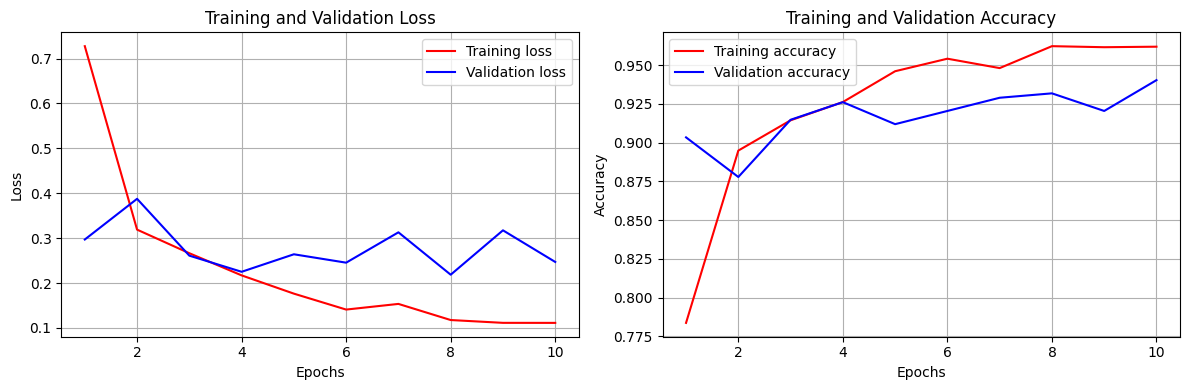

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict labels using trained model
y_pred_probs = model.predict(test_generator)

# Convert predicted labels from one-hot encoded to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class labels from the data generator
class_labels = test_generator.class_indices

# Get the list of class names in the correct order
class_names = list(class_labels.keys())

# Generate a classification report
report = classification_report(
    test_generator.classes,
    y_pred,
    target_names=class_names
)

# Print the report
print(report)


 6/12 [==============>...............] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 3s 157ms/step
              precision    recall  f1-score   support

        aiye       1.00      1.00      1.00        25
       baihe       0.96      0.96      0.96        25
    chongcao       0.96      0.96      0.96        25
    dangshen       0.79      0.92      0.85        25
      fuling       0.96      1.00      0.98        25
      gancao       0.88      0.88      0.88        25
       gouqi       0.96      1.00      0.98        25
    heshouwu       0.96      1.00      0.98        25
    huangbai       0.96      0.92      0.94        25
     huangqi       0.86      0.72      0.78        25
   jinyinhua       0.93      1.00      0.96        25
   luohanguo       0.89      0.96      0.92        25
     renshen       1.00      0.88      0.94        25
     shanyao       0.92      0.96      0.94        25
 tiannanxing       1.00      0.84      0.91        25

    accuracy                           0.93       375
   macro avg       0.94  

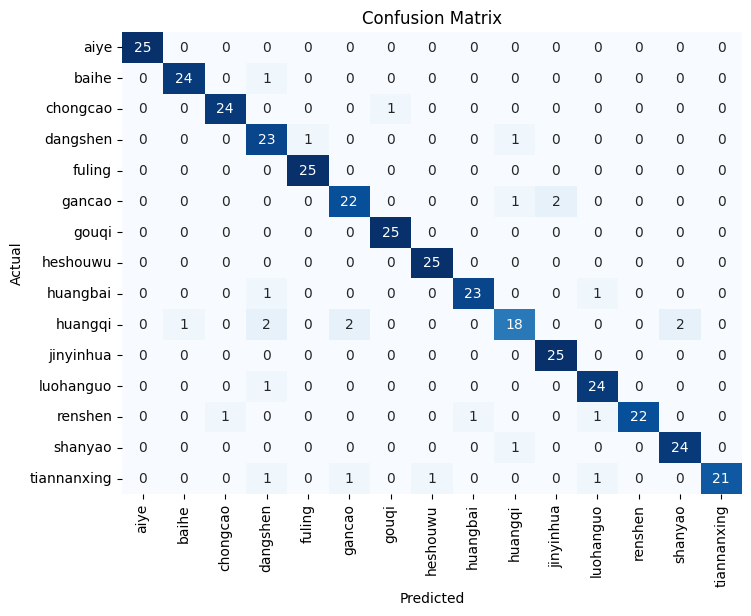

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_generator.classes,y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_4[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 1024)              1311744   
                                                                 
 dense_5 (Dense)             (None, 15)                15375     
                                                                 
Total params: 3585103 (13.68 MB)
Trainable params: 1327119 (5.06 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
# Fine Tuning 1
# Learning rate = 0.01

In [ ]:
import numpy as np
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define batch size and epochs to train the model
batch_size = 32
epochs = 10

print(f"Training with batch_size={batch_size}, epochs={epochs}")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Training with batch_size=32, epochs=10
Epoch 1/10
93/93 [==============================] - 70s 683ms/step - loss: 2.5366 - accuracy: 0.6998 - val_loss: 0.3765 - val_accuracy: 0.8864
Epoch 2/10
93/93 [==============================] - 61s 652ms/step - loss: 0.3881 - accuracy: 0.8834 - val_loss: 0.4636 - val_accuracy: 0.8580
Epoch 3/10
93/93 [==============================] - 62s 673ms/step - loss: 0.3445 - accuracy: 0.8892 - val_loss: 0.3181 - val_accuracy: 0.9233
Epoch 4/10
93/93 [==============================] - 62s 665ms/step - loss: 0.2984 - accuracy: 0.9097 - val_loss: 0.3690 - val_accuracy: 0.8949
Epoch 5/10
93/93 [==============================] - 62s 673ms/step - loss: 0.2927 - accuracy: 0.9070 - val_loss: 0.2968 - val_accuracy: 0.9091
Epoch 6/10
93/93 [==============================] - 62s 668ms/step - loss: 0.2544 - accuracy: 0.9235 - val_loss: 0.3699 - val_accuracy: 0.9062
Epoch 7/10
93/93 [==============================] - 65s 696ms/step - loss: 0.2894 - accuracy: 0.9171 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy for batch_size={batch_size}, epochs={epochs}: {test_accuracy}")
print(f"Test loss: {test_loss}")

 6/12 [==============>...............] - ETA: 0s - loss: 0.4078 - accuracy: 0.9167

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 2s 134ms/step - loss: 0.3420 - accuracy: 0.9227
Test accuracy for batch_size=32, epochs=10: 0.9226666688919067
Test loss: 0.34204235672950745


In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Training Loss: [2.536642074584961, 0.3880646228790283, 0.34452882409095764, 0.29844930768013, 0.2927486300468445, 0.254416823387146, 0.2893921136856079, 0.25691160559654236, 0.25321024656295776, 0.21210932731628418]
Training Accuracy: [0.6997978687286377, 0.8834232091903687, 0.8891509175300598, 0.9097034931182861, 0.9070081114768982, 0.9235175251960754, 0.9171159267425537, 0.9241913557052612, 0.9247311949729919, 0.9342991709709167]
Validation Loss: [0.3764899969100952, 0.4636358320713043, 0.31806209683418274, 0.36899489164352417, 0.29678967595100403, 0.369904488325119, 0.3558937609195709, 0.3502519428730011, 0.4199530780315399, 0.2932485342025757]
Validation Accuracy: [0.8863636255264282, 0.8579545617103577, 0.9232954382896423, 0.8948863744735718, 0.9090909361839294, 0.90625, 0.90625, 0.9119318127632141, 0.9034090638160706, 0.9403409361839294]


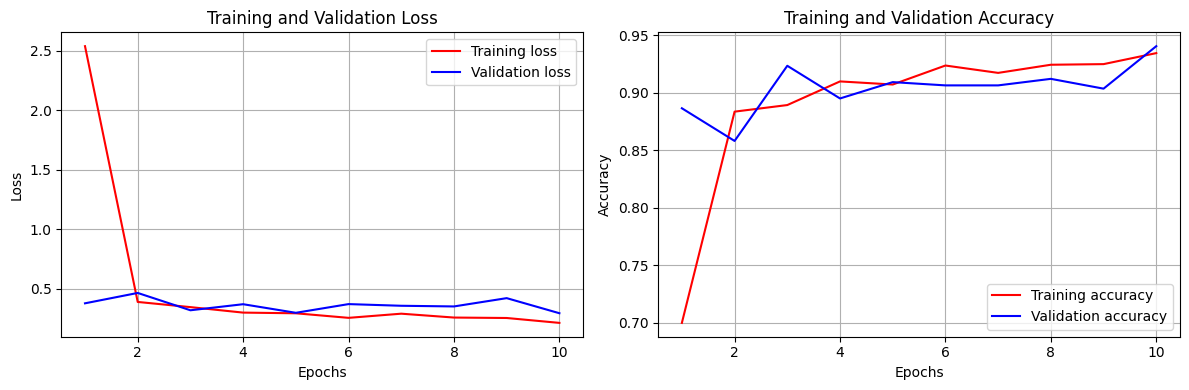

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict labels using trained model
y_pred_probs = model.predict(test_generator)

# Convert predicted labels from one-hot encoded to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class labels from the data generator
class_labels = test_generator.class_indices

# Get the list of class names in the correct order
class_names = list(class_labels.keys())

# Generate a classification report
report = classification_report(
    test_generator.classes,
    y_pred,
    target_names=class_names
)

# Print the report
print(report)


12/12 [==============================] - 4s 200ms/step
              precision    recall  f1-score   support

        aiye       1.00      1.00      1.00        25
       baihe       0.93      1.00      0.96        25
    chongcao       0.96      0.92      0.94        25
    dangshen       0.95      0.76      0.84        25
      fuling       0.96      1.00      0.98        25
      gancao       0.86      0.72      0.78        25
       gouqi       0.96      1.00      0.98        25
    heshouwu       0.92      0.96      0.94        25
    huangbai       1.00      1.00      1.00        25
     huangqi       0.67      0.88      0.76        25
   jinyinhua       0.93      1.00      0.96        25
   luohanguo       0.96      0.92      0.94        25
     renshen       0.96      0.96      0.96        25
     shanyao       0.92      0.96      0.94        25
 tiannanxing       0.95      0.76      0.84        25

    accuracy                           0.92       375
   macro avg       0.93  

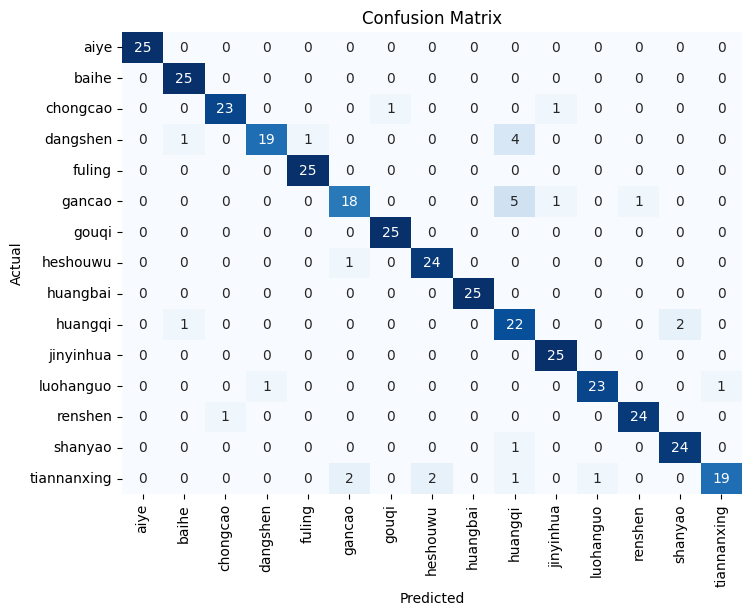

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_generator.classes,y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Fine Tuning 2
# Learning rate = 0.0001

In [ ]:
import numpy as np
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define batch size and epochs to train the model
batch_size = 32
epochs = 10

print(f"Training with batch_size={batch_size}, epochs={epochs}")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Training with batch_size=32, epochs=10
Epoch 1/10
93/93 [==============================] - 75s 774ms/step - loss: 1.3006 - accuracy: 0.6563 - val_loss: 0.5910 - val_accuracy: 0.8551
Epoch 2/10
93/93 [==============================] - 58s 629ms/step - loss: 0.5013 - accuracy: 0.8642 - val_loss: 0.4013 - val_accuracy: 0.8892
Epoch 3/10
93/93 [==============================] - 60s 648ms/step - loss: 0.3678 - accuracy: 0.8972 - val_loss: 0.3153 - val_accuracy: 0.9176
Epoch 4/10
93/93 [==============================] - 59s 630ms/step - loss: 0.2787 - accuracy: 0.9303 - val_loss: 0.2815 - val_accuracy: 0.9205
Epoch 5/10
93/93 [==============================] - 62s 661ms/step - loss: 0.2433 - accuracy: 0.9289 - val_loss: 0.2642 - val_accuracy: 0.9233
Epoch 6/10
93/93 [==============================] - 59s 627ms/step - loss: 0.2105 - accuracy: 0.9464 - val_loss: 0.2757 - val_accuracy: 0.9148
Epoch 7/10
93/93 [==============================] - 59s 637ms/step - loss: 0.1978 - accuracy: 0.9410 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy for batch_size={batch_size}, epochs={epochs}: {test_accuracy}")
print(f"Test loss: {test_loss}")

 6/12 [==============>...............] - ETA: 0s - loss: 0.2162 - accuracy: 0.9531

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 2s 167ms/step - loss: 0.2180 - accuracy: 0.9333
Test accuracy for batch_size=32, epochs=10: 0.9333333373069763
Test loss: 0.21801212430000305


In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Training Loss: [1.3006306886672974, 0.5012719631195068, 0.36777347326278687, 0.27867740392684937, 0.2432633936405182, 0.21046943962574005, 0.19780686497688293, 0.1684362143278122, 0.15714405477046967, 0.14459775388240814]
Training Accuracy: [0.6563342213630676, 0.8642183542251587, 0.8972371816635132, 0.9302560687065125, 0.9289083480834961, 0.9464285969734192, 0.9410377144813538, 0.9497978687286377, 0.9535040259361267, 0.960579514503479]
Validation Loss: [0.5910046100616455, 0.4012647569179535, 0.3153213858604431, 0.28153255581855774, 0.264160692691803, 0.2756602466106415, 0.23852625489234924, 0.21704381704330444, 0.21693314611911774, 0.19537200033664703]
Validation Accuracy: [0.8551136255264282, 0.8892045617103577, 0.9176136255264282, 0.9204545617103577, 0.9232954382896423, 0.9147727489471436, 0.9289772510528564, 0.9261363744735718, 0.9403409361839294, 0.9318181872367859]


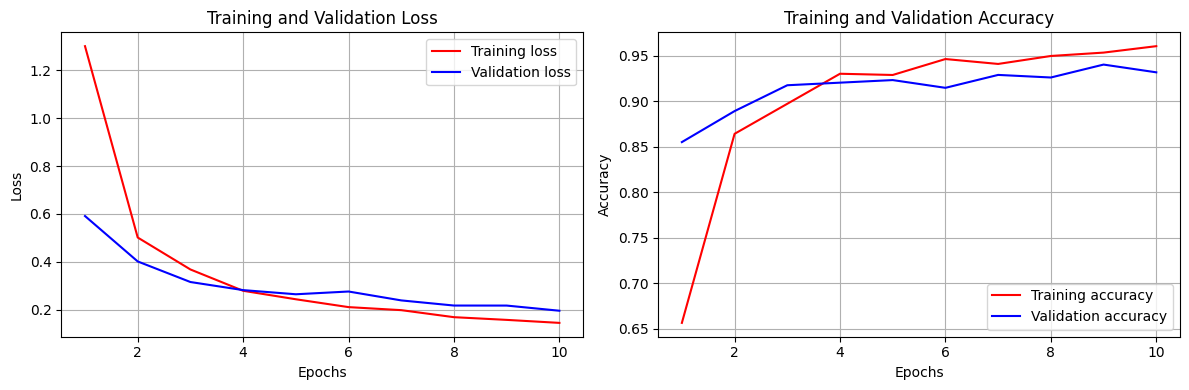

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict labels using trained model
y_pred_probs = model.predict(test_generator)

# Convert predicted labels from one-hot encoded to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class labels from the data generator
class_labels = test_generator.class_indices

# Get the list of class names in the correct order
class_names = list(class_labels.keys())

# Generate a classification report
report = classification_report(
    test_generator.classes,
    y_pred,
    target_names=class_names
)

# Print the report
print(report)


12/12 [==============================] - 3s 136ms/step
              precision    recall  f1-score   support

        aiye       1.00      1.00      1.00        25
       baihe       0.96      1.00      0.98        25
    chongcao       0.93      1.00      0.96        25
    dangshen       1.00      0.76      0.86        25
      fuling       1.00      1.00      1.00        25
      gancao       0.92      0.88      0.90        25
       gouqi       1.00      1.00      1.00        25
    heshouwu       1.00      0.96      0.98        25
    huangbai       0.92      0.96      0.94        25
     huangqi       0.78      0.84      0.81        25
   jinyinhua       0.93      1.00      0.96        25
   luohanguo       0.92      0.96      0.94        25
     renshen       0.92      0.88      0.90        25
     shanyao       0.85      0.88      0.86        25
 tiannanxing       0.92      0.88      0.90        25

    accuracy                           0.93       375
   macro avg       0.94  

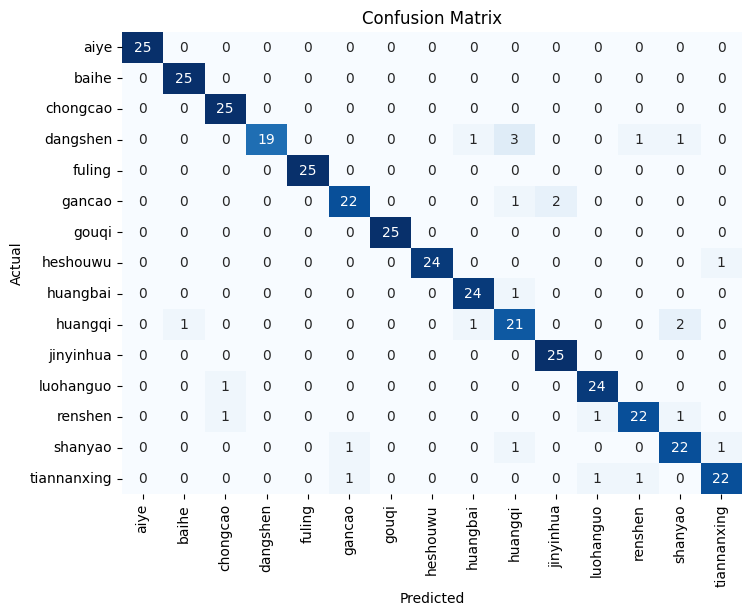

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_generator.classes,y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Fine Tuning 3
# Optimizer = RMSprop
# Learing rate = 0.001

In [ ]:
import numpy as np
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define batch size and epochs to train the model
batch_size = 32
epochs = 10

print(f"Training with batch_size={batch_size}, epochs={epochs}")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Training with batch_size=32, epochs=10
Epoch 1/10
93/93 [==============================] - 64s 655ms/step - loss: 1.0647 - accuracy: 0.7214 - val_loss: 0.4511 - val_accuracy: 0.8636
Epoch 2/10
93/93 [==============================] - 59s 633ms/step - loss: 0.4120 - accuracy: 0.8777 - val_loss: 0.3531 - val_accuracy: 0.8949
Epoch 3/10
93/93 [==============================] - 59s 638ms/step - loss: 0.3010 - accuracy: 0.9060 - val_loss: 0.3692 - val_accuracy: 0.9176
Epoch 4/10
93/93 [==============================] - 59s 635ms/step - loss: 0.2689 - accuracy: 0.9164 - val_loss: 0.3115 - val_accuracy: 0.9261
Epoch 5/10
93/93 [==============================] - 58s 628ms/step - loss: 0.2237 - accuracy: 0.9296 - val_loss: 0.2942 - val_accuracy: 0.9205
Epoch 6/10
93/93 [==============================] - 58s 627ms/step - loss: 0.1854 - accuracy: 0.9367 - val_loss: 0.2532 - val_accuracy: 0.9261
Epoch 7/10
93/93 [==============================] - 59s 637ms/step - loss: 0.1809 - accuracy: 0.9437 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy for batch_size={batch_size}, epochs={epochs}: {test_accuracy}")
print(f"Test loss: {test_loss}")

 6/12 [==============>...............] - ETA: 0s - loss: 0.2467 - accuracy: 0.9583

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 2s 130ms/step - loss: 0.3062 - accuracy: 0.9440
Test accuracy for batch_size=32, epochs=10: 0.9440000057220459
Test loss: 0.3062307834625244


In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Training Loss: [1.0647051334381104, 0.4119856059551239, 0.30096617341041565, 0.2688954472541809, 0.22374475002288818, 0.18541431427001953, 0.18087153136730194, 0.14621935784816742, 0.1522756963968277, 0.13670092821121216]
Training Accuracy: [0.7213611602783203, 0.8776954412460327, 0.9059972763061523, 0.9164420366287231, 0.9295822381973267, 0.9366576671600342, 0.9437331557273865, 0.9535040259361267, 0.9508086442947388, 0.9518194198608398]
Validation Loss: [0.4510655403137207, 0.3530670404434204, 0.3691682517528534, 0.31148770451545715, 0.294190913438797, 0.25319135189056396, 0.2689392864704132, 0.2873094975948334, 0.37921324372291565, 0.2786117494106293]
Validation Accuracy: [0.8636363744735718, 0.8948863744735718, 0.9176136255264282, 0.9261363744735718, 0.9204545617103577, 0.9261363744735718, 0.9375, 0.9375, 0.9090909361839294, 0.9289772510528564]


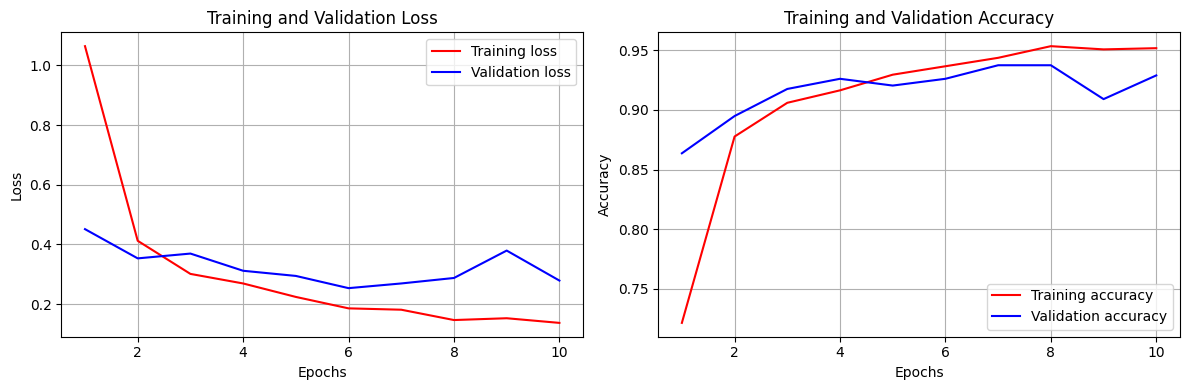

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict labels using trained model
y_pred_probs = model.predict(test_generator)

# Convert predicted labels from one-hot encoded to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class labels from the data generator
class_labels = test_generator.class_indices

# Get the list of class names in the correct order
class_names = list(class_labels.keys())

# Generate a classification report
report = classification_report(
    test_generator.classes,
    y_pred,
    target_names=class_names
)

# Print the report
print(report)


12/12 [==============================] - 2s 128ms/step
              precision    recall  f1-score   support

        aiye       1.00      1.00      1.00        25
       baihe       1.00      1.00      1.00        25
    chongcao       1.00      0.92      0.96        25
    dangshen       0.81      0.88      0.85        25
      fuling       1.00      1.00      1.00        25
      gancao       0.88      0.88      0.88        25
       gouqi       1.00      1.00      1.00        25
    heshouwu       0.93      1.00      0.96        25
    huangbai       1.00      0.92      0.96        25
     huangqi       0.87      0.80      0.83        25
   jinyinhua       0.96      1.00      0.98        25
   luohanguo       1.00      0.96      0.98        25
     renshen       0.83      1.00      0.91        25
     shanyao       0.93      1.00      0.96        25
 tiannanxing       1.00      0.80      0.89        25

    accuracy                           0.94       375
   macro avg       0.95  

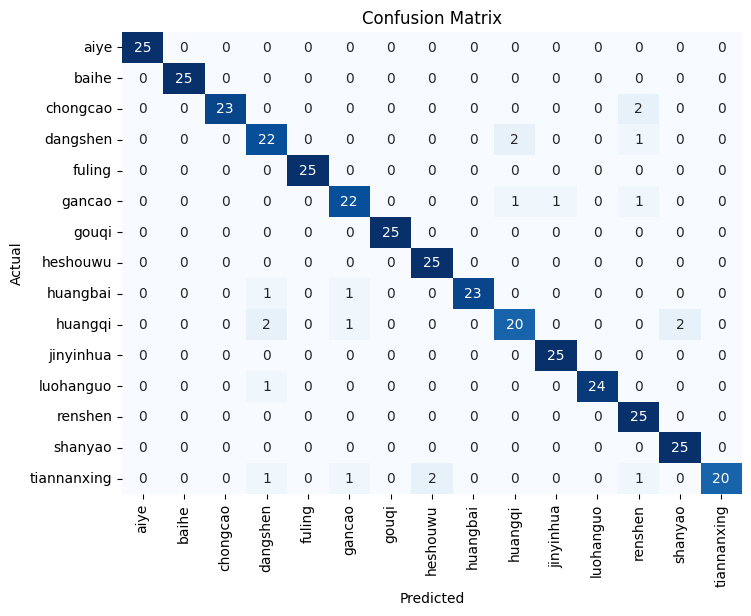

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_generator.classes,y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Fine Tuning 4
# Learning Rate = 0.001
# Optimizer = RMSprop
# Unfreeze layers

In [ ]:
import numpy as np
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last few layers
for layer in base_model.layers[-30:]:
    layer.trainable = True

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define batch size and epochs to train the model
batch_size = 32
epochs = 10

print(f"Training with batch_size={batch_size}, epochs={epochs}")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Training with batch_size=32, epochs=10
Epoch 1/10
93/93 [==============================] - 83s 685ms/step - loss: 1.3751 - accuracy: 0.6243 - val_loss: 13.0134 - val_accuracy: 0.1278
Epoch 2/10
93/93 [==============================] - 62s 665ms/step - loss: 0.8049 - accuracy: 0.7722 - val_loss: 12.6181 - val_accuracy: 0.2443
Epoch 3/10
93/93 [==============================] - 62s 669ms/step - loss: 0.6874 - accuracy: 0.8053 - val_loss: 13.5288 - val_accuracy: 0.1506
Epoch 4/10
93/93 [==============================] - 76s 816ms/step - loss: 0.5740 - accuracy: 0.8332 - val_loss: 17.1038 - val_accuracy: 0.1420
Epoch 5/10
93/93 [==============================] - 64s 683ms/step - loss: 0.5362 - accuracy: 0.8406 - val_loss: 43.6410 - val_accuracy: 0.0710
Epoch 6/10
93/93 [==============================] - 63s 674ms/step - loss: 0.4689 - accuracy: 0.8575 - val_loss: 25.0334 - val_accuracy: 0.0710
Epoch 7/10
93/93 [==============================] - 60s 649ms/step - loss: 0.4378 - accuracy: 0.8

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy for batch_size={batch_size}, epochs={epochs}: {test_accuracy}")
print(f"Test loss: {test_loss}")

 6/12 [==============>...............] - ETA: 0s - loss: 13.0190 - accuracy: 0.2604

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 2s 134ms/step - loss: 12.7747 - accuracy: 0.2587
Test accuracy for batch_size=32, epochs=10: 0.25866666436195374
Test loss: 12.774652481079102


In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Training Loss: [1.3750797510147095, 0.8048526048660278, 0.6874367594718933, 0.5740200877189636, 0.5361881852149963, 0.46893876791000366, 0.4377836287021637]
Training Accuracy: [0.6243261694908142, 0.7722371816635132, 0.8052560687065125, 0.8332210183143616, 0.8406334519386292, 0.8574798107147217, 0.8753369450569153]
Validation Loss: [13.013351440429688, 12.618147850036621, 13.528820991516113, 17.10379409790039, 43.64101791381836, 25.0334415435791, 25.619823455810547]
Validation Accuracy: [0.12784090638160706, 0.2443181872367859, 0.1505681872367859, 0.14204545319080353, 0.07102272659540176, 0.07102272659540176, 0.07386363297700882]


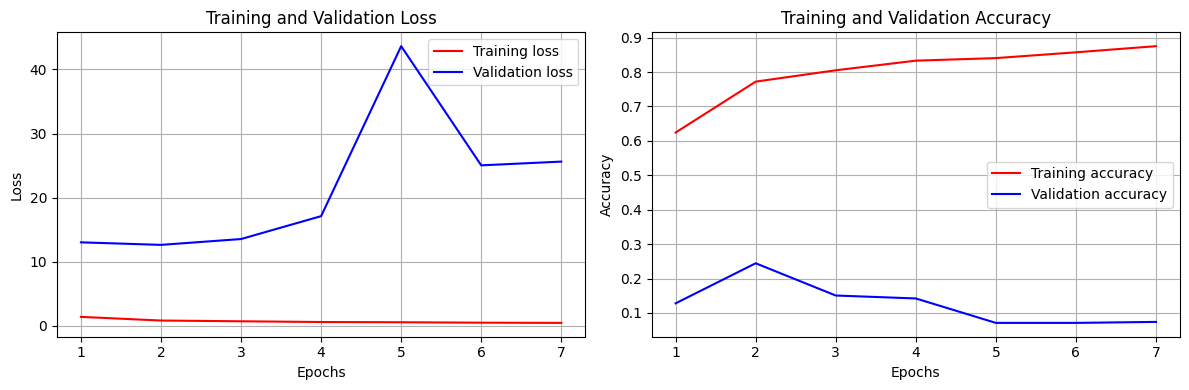

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict labels using trained model
y_pred_probs = model.predict(test_generator)

# Convert predicted labels from one-hot encoded to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class labels from the data generator
class_labels = test_generator.class_indices

# Get the list of class names in the correct order
class_names = list(class_labels.keys())

# Generate a classification report
report = classification_report(
    test_generator.classes,
    y_pred,
    target_names=class_names
)

# Print the report
print(report)


12/12 [==============================] - 3s 166ms/step
              precision    recall  f1-score   support

        aiye       0.00      0.00      0.00        25
       baihe       0.00      0.00      0.00        25
    chongcao       0.33      0.80      0.47        25
    dangshen       0.73      0.44      0.55        25
      fuling       0.60      0.72      0.65        25
      gancao       0.00      0.00      0.00        25
       gouqi       1.00      0.04      0.08        25
    heshouwu       0.00      0.00      0.00        25
    huangbai       1.00      0.04      0.08        25
     huangqi       0.00      0.00      0.00        25
   jinyinhua       0.57      0.84      0.68        25
   luohanguo       0.11      1.00      0.21        25
     renshen       0.00      0.00      0.00        25
     shanyao       0.00      0.00      0.00        25
 tiannanxing       0.00      0.00      0.00        25

    accuracy                           0.26       375
   macro avg       0.29  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


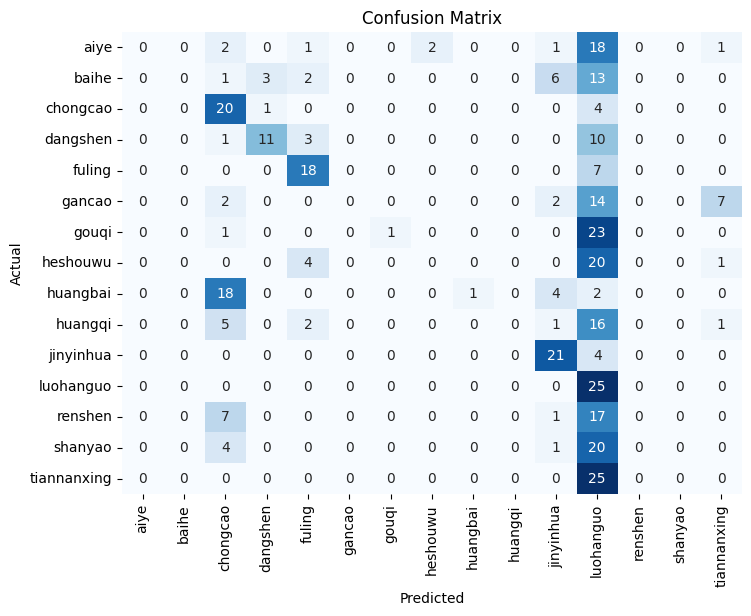

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_generator.classes,y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_6  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_12 (Dense)            (None, 1024)              1311744   
                                                                 
 dense_13 (Dense)            (None, 15)                15375     
                                                                 
Total params: 3585103 (13.68 MB)
Trainable params: 3550991 (13.55 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


In [ ]:
# Training Final Model
# Learning Rate = 0.001
# Optimizer = RMSprop
# Epoch = 50
# Freeze the pre-trained layers

In [ ]:
import numpy as np
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))

checkpoint = ModelCheckpoint('mobilenetv2_best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=0, save_freq='epoch')

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Define batch size and epochs to train the model
batch_size = 32
epochs = 50

print(f"Training with batch_size={batch_size}, epochs={epochs}")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]
)

Training with batch_size=32, epochs=50
Epoch 1/50
93/93 [==============================] - ETA: 0s - loss: 1.0491 - accuracy: 0.7220

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


93/93 [==============================] - 67s 682ms/step - loss: 1.0491 - accuracy: 0.7220 - val_loss: 0.3737 - val_accuracy: 0.8778
Epoch 2/50
93/93 [==============================] - 58s 625ms/step - loss: 0.4141 - accuracy: 0.8760 - val_loss: 0.2675 - val_accuracy: 0.9034
Epoch 3/50
93/93 [==============================] - 62s 671ms/step - loss: 0.3136 - accuracy: 0.9063 - val_loss: 0.3036 - val_accuracy: 0.9006
Epoch 4/50
93/93 [==============================] - 57s 612ms/step - loss: 0.2423 - accuracy: 0.9252 - val_loss: 0.3886 - val_accuracy: 0.8892
Epoch 5/50
93/93 [==============================] - 58s 625ms/step - loss: 0.2086 - accuracy: 0.9333 - val_loss: 0.3104 - val_accuracy: 0.9205
Epoch 6/50
93/93 [==============================] - 59s 631ms/step - loss: 0.1933 - accuracy: 0.9346 - val_loss: 0.2153 - val_accuracy: 0.9261
Epoch 7/50
93/93 [==============================] - 57s 614ms/step - loss: 0.1692 - accuracy: 0.9447 - val_loss: 0.2327 - val_accuracy: 0.9489
Epoch 8/50

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy for batch_size={batch_size}, epochs={epochs}: {test_accuracy}")
print(f"Test loss: {test_loss}")

 6/12 [==============>...............] - ETA: 0s - loss: 0.2641 - accuracy: 0.9688

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 2s 128ms/step - loss: 0.2589 - accuracy: 0.9387
Test accuracy for batch_size=32, epochs=50: 0.9386666417121887
Test loss: 0.2588671147823334


In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Training Loss: [1.0490552186965942, 0.41406726837158203, 0.3135601580142975, 0.24232567846775055, 0.20855724811553955, 0.19330765306949615, 0.16923445463180542, 0.14729191362857819, 0.13774780929088593, 0.13651005923748016, 0.12906953692436218, 0.11942737549543381, 0.10327743738889694, 0.09512694925069809, 0.09644963592290878, 0.09147293120622635, 0.09222090244293213]
Training Accuracy: [0.7220350503921509, 0.8760107755661011, 0.9063342213630676, 0.9252021312713623, 0.9332883954048157, 0.934636116027832, 0.9447439312934875, 0.9535040259361267, 0.9585579633712769, 0.9551886916160583, 0.9575471878051758, 0.9622641801834106, 0.9663072824478149, 0.9700134992599487, 0.9696765542030334, 0.9703503847122192, 0.9696765542030334]
Validation Loss: [0.37370604276657104, 0.26754868030548096, 0.3036390542984009, 0.38857272267341614, 0.31044790148735046, 0.21533380448818207, 0.23272866010665894, 0.2775348722934723, 0.31337106227874756, 0.19158197939395905, 0.25421974062919617, 0.1694089025259018, 0.2

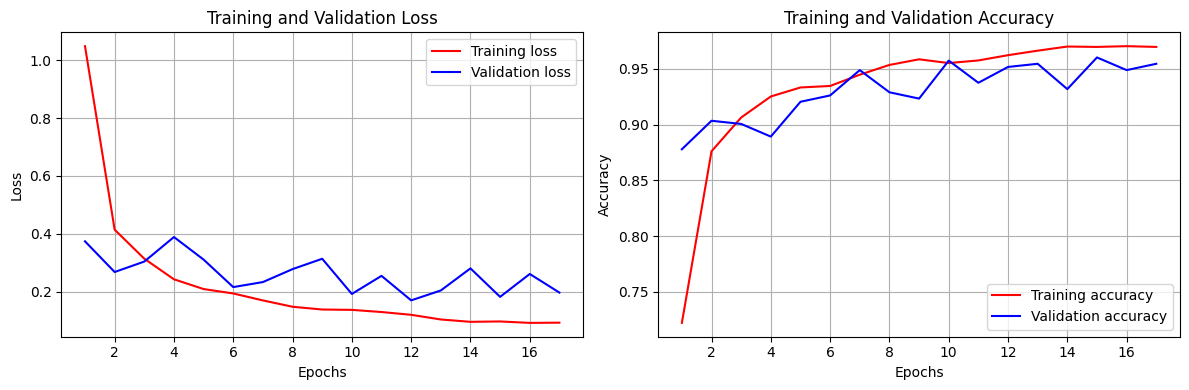

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict labels using trained model
y_pred_probs = model.predict(test_generator)

# Convert predicted labels from one-hot encoded to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class labels from the data generator
class_labels = test_generator.class_indices

# Get the list of class names in the correct order
class_names = list(class_labels.keys())

# Generate a classification report
report = classification_report(
    test_generator.classes,
    y_pred,
    target_names=class_names
)

# Print the report
print(report)


12/12 [==============================] - 2s 132ms/step
              precision    recall  f1-score   support

        aiye       1.00      1.00      1.00        25
       baihe       0.96      1.00      0.98        25
    chongcao       0.93      1.00      0.96        25
    dangshen       0.96      0.92      0.94        25
      fuling       0.89      1.00      0.94        25
      gancao       0.92      0.88      0.90        25
       gouqi       1.00      1.00      1.00        25
    heshouwu       0.96      0.96      0.96        25
    huangbai       0.92      0.96      0.94        25
     huangqi       0.85      0.92      0.88        25
   jinyinhua       0.93      1.00      0.96        25
   luohanguo       0.92      0.92      0.92        25
     renshen       0.96      0.88      0.92        25
     shanyao       1.00      0.84      0.91        25
 tiannanxing       0.91      0.80      0.85        25

    accuracy                           0.94       375
   macro avg       0.94  

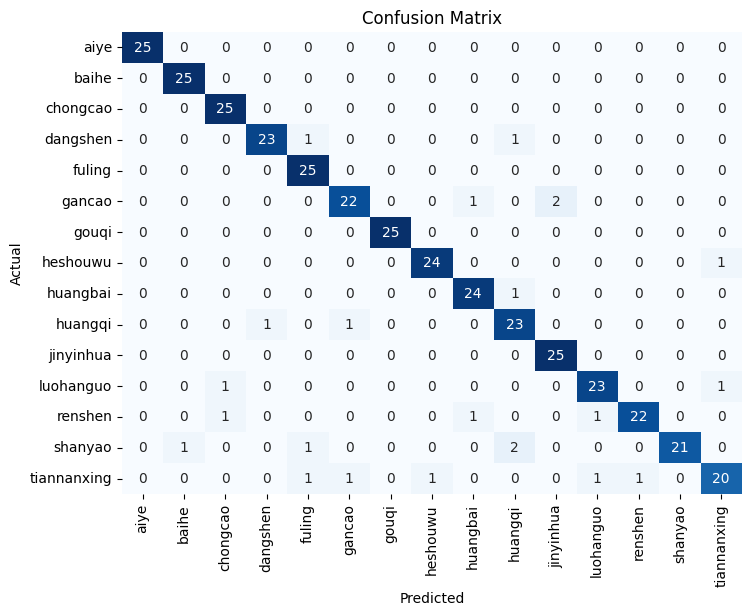

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_generator.classes,y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Training Final Model 2
# Learning Rate = 0.0001
# Optimizer = RMSprop
# Epoch = 50
# Freeze the pre-trained layers

In [ ]:
import numpy as np
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))

checkpoint = ModelCheckpoint('mobilenetv2_best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=0, save_freq='epoch')

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Define batch size and epochs to train the model
batch_size = 32
epochs = 50

print(f"Training with batch_size={batch_size}, epochs={epochs}")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]
)

Training with batch_size=32, epochs=50
Epoch 1/50
93/93 [==============================] - ETA: 0s - loss: 1.1849 - accuracy: 0.6927

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


93/93 [==============================] - 63s 652ms/step - loss: 1.1849 - accuracy: 0.6927 - val_loss: 0.5588 - val_accuracy: 0.8580
Epoch 2/50
93/93 [==============================] - 59s 633ms/step - loss: 0.4787 - accuracy: 0.8757 - val_loss: 0.3623 - val_accuracy: 0.9006
Epoch 3/50
93/93 [==============================] - 58s 625ms/step - loss: 0.3344 - accuracy: 0.9080 - val_loss: 0.3048 - val_accuracy: 0.9119
Epoch 4/50
93/93 [==============================] - 58s 623ms/step - loss: 0.2740 - accuracy: 0.9218 - val_loss: 0.2811 - val_accuracy: 0.9062
Epoch 5/50
93/93 [==============================] - 59s 639ms/step - loss: 0.2287 - accuracy: 0.9367 - val_loss: 0.2482 - val_accuracy: 0.9261
Epoch 6/50
93/93 [==============================] - 58s 622ms/step - loss: 0.1988 - accuracy: 0.9437 - val_loss: 0.2329 - val_accuracy: 0.9205
Epoch 7/50
93/93 [==============================] - 59s 633ms/step - loss: 0.1740 - accuracy: 0.9518 - val_loss: 0.2184 - val_accuracy: 0.9205
Epoch 8/50

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy for batch_size={batch_size}, epochs={epochs}: {test_accuracy}")
print(f"Test loss: {test_loss}")

 6/12 [==============>...............] - ETA: 0s - loss: 0.2397 - accuracy: 0.9427

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 2s 130ms/step - loss: 0.2411 - accuracy: 0.9360
Test accuracy for batch_size=32, epochs=50: 0.9359999895095825
Test loss: 0.2410900741815567


In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Training Loss: [1.1848673820495605, 0.4786829352378845, 0.33444857597351074, 0.27404138445854187, 0.22874343395233154, 0.19879187643527985, 0.17397601902484894, 0.16154494881629944, 0.15394775569438934, 0.13047663867473602, 0.1424872875213623, 0.12495454400777817, 0.11392300575971603, 0.11244597285985947, 0.09576773643493652, 0.10260528326034546, 0.09655150026082993]
Training Accuracy: [0.6927223801612854, 0.8756738305091858, 0.9080188870429993, 0.9218328595161438, 0.9366576671600342, 0.9437331557273865, 0.9518194198608398, 0.9551886916160583, 0.9555255770683289, 0.9612533450126648, 0.9575471878051758, 0.9656334519386292, 0.9690027236938477, 0.9693396091461182, 0.9720350503921509, 0.9686657786369324, 0.9723719954490662]
Validation Loss: [0.5587562918663025, 0.3622838258743286, 0.3047689199447632, 0.2811097800731659, 0.2482246458530426, 0.23286102712154388, 0.21835342049598694, 0.19813479483127594, 0.21819153428077698, 0.17746055126190186, 0.19587963819503784, 0.15423278510570526, 0.172

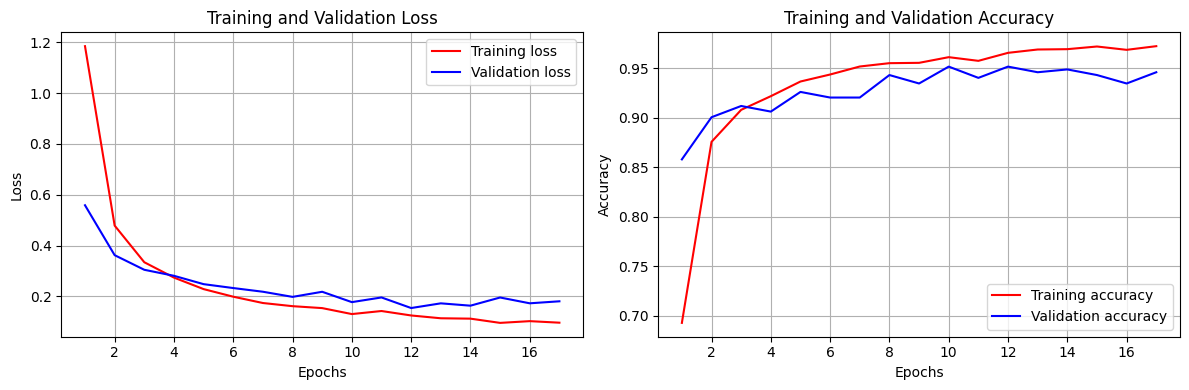

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict labels using trained model
y_pred_probs = model.predict(test_generator)

# Convert predicted labels from one-hot encoded to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class labels from the data generator
class_labels = test_generator.class_indices

# Get the list of class names in the correct order
class_names = list(class_labels.keys())

# Generate a classification report
report = classification_report(
    test_generator.classes,
    y_pred,
    target_names=class_names
)

# Print the report
print(report)


12/12 [==============================] - 2s 128ms/step
              precision    recall  f1-score   support

        aiye       1.00      1.00      1.00        25
       baihe       0.96      1.00      0.98        25
    chongcao       0.89      1.00      0.94        25
    dangshen       0.95      0.80      0.87        25
      fuling       0.93      1.00      0.96        25
      gancao       0.95      0.80      0.87        25
       gouqi       1.00      0.96      0.98        25
    heshouwu       0.96      1.00      0.98        25
    huangbai       0.96      1.00      0.98        25
     huangqi       0.79      0.92      0.85        25
   jinyinhua       0.93      1.00      0.96        25
   luohanguo       0.92      0.96      0.94        25
     renshen       0.96      0.88      0.92        25
     shanyao       0.88      0.92      0.90        25
 tiannanxing       1.00      0.80      0.89        25

    accuracy                           0.94       375
   macro avg       0.94  

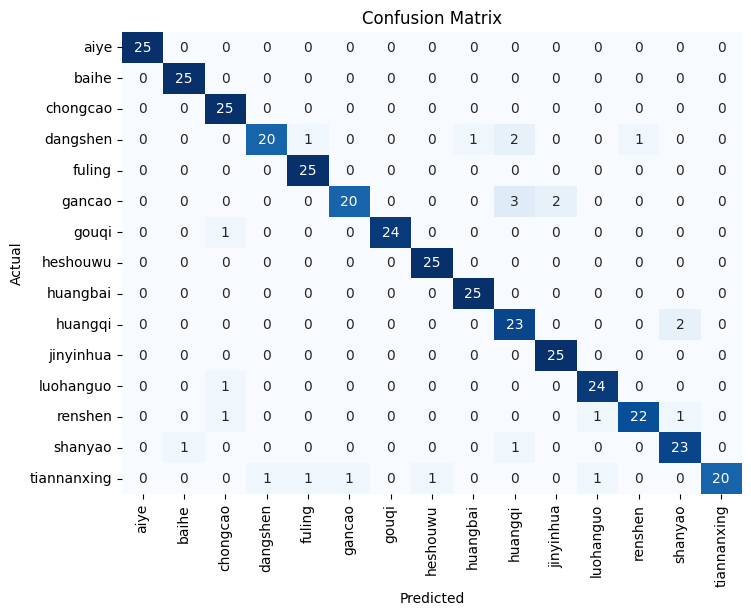

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_generator.classes,y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Training Final Model 3
# Learning Rate = 0.0001
# Optimizer = Adam
# Epoch = 50
# Freeze the pre-trained layers

In [ ]:
import numpy as np
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))

checkpoint = ModelCheckpoint('mobilenetv2_best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=0, save_freq='epoch')

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Define batch size and epochs to train the model
batch_size = 32
epochs = 50

print(f"Training with batch_size={batch_size}, epochs={epochs}")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]
)

9406464/9406464 [==============================] - 0s 0us/step
Training with batch_size=32, epochs=50
Epoch 1/50
93/93 [==============================] - ETA: 0s - loss: 1.3351 - accuracy: 0.6570

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


93/93 [==============================] - 928s 10s/step - loss: 1.3351 - accuracy: 0.6570 - val_loss: 0.5867 - val_accuracy: 0.8551
Epoch 2/50
93/93 [==============================] - 54s 577ms/step - loss: 0.5039 - accuracy: 0.8679 - val_loss: 0.3786 - val_accuracy: 0.9006
Epoch 3/50
93/93 [==============================] - 54s 584ms/step - loss: 0.3488 - accuracy: 0.9097 - val_loss: 0.3124 - val_accuracy: 0.9176
Epoch 4/50
93/93 [==============================] - 55s 593ms/step - loss: 0.2846 - accuracy: 0.9262 - val_loss: 0.2708 - val_accuracy: 0.9290
Epoch 5/50
93/93 [==============================] - 54s 586ms/step - loss: 0.2388 - accuracy: 0.9377 - val_loss: 0.2402 - val_accuracy: 0.9347
Epoch 6/50
93/93 [==============================] - 55s 584ms/step - loss: 0.2172 - accuracy: 0.9410 - val_loss: 0.2218 - val_accuracy: 0.9375
Epoch 7/50
93/93 [==============================] - 53s 573ms/step - loss: 0.2055 - accuracy: 0.9431 - val_loss: 0.2221 - val_accuracy: 0.9290
Epoch 8/50


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy for batch_size={batch_size}, epochs={epochs}: {test_accuracy}")
print(f"Test loss: {test_loss}")

 5/12 [===========>..................] - ETA: 1:08 - loss: 0.2662 - accuracy: 0.9563

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 103s 9s/step - loss: 0.2057 - accuracy: 0.9413
Test accuracy for batch_size=32, epochs=50: 0.9413333535194397
Test loss: 0.20574574172496796


In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Training Loss: [1.3350956439971924, 0.5039066672325134, 0.3488474190235138, 0.2845649719238281, 0.23884759843349457, 0.21722033619880676, 0.20545075833797455, 0.17699216306209564, 0.15461863577365875, 0.15163598954677582, 0.13256824016571045, 0.11724275350570679, 0.12202943861484528, 0.10335498303174973, 0.09229706227779388, 0.1031704694032669, 0.0890314131975174, 0.08169101923704147, 0.0767272561788559, 0.07926373928785324, 0.07028009742498398, 0.06759793311357498, 0.06228932738304138, 0.057242754846811295, 0.06277325749397278, 0.06330104917287827, 0.05809740722179413, 0.053790464997291565, 0.05921332538127899, 0.05695226788520813, 0.05240841954946518, 0.054204750806093216, 0.045560259371995926, 0.05296922102570534, 0.03725472092628479]
Training Accuracy: [0.6570081114768982, 0.8679245114326477, 0.9097034931182861, 0.9262129664421082, 0.9376684427261353, 0.9410377144813538, 0.9430593252182007, 0.9484501481056213, 0.9565364122390747, 0.953840970993042, 0.967318058013916, 0.967991888523

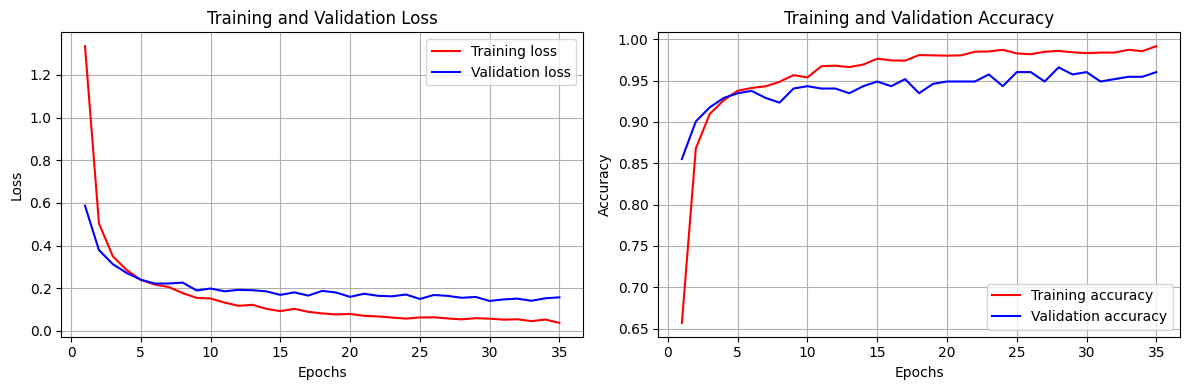

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict labels using trained model
y_pred_probs = model.predict(test_generator)

# Convert predicted labels from one-hot encoded to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class labels from the data generator
class_labels = test_generator.class_indices

# Get the list of class names in the correct order
class_names = list(class_labels.keys())

# Generate a classification report
report = classification_report(
    test_generator.classes,
    y_pred,
    target_names=class_names
)

# Print the report
print(report)


 6/12 [==============>...............] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 3s 159ms/step
              precision    recall  f1-score   support

        aiye       1.00      1.00      1.00        25
       baihe       0.93      1.00      0.96        25
    chongcao       0.89      1.00      0.94        25
    dangshen       0.92      0.88      0.90        25
      fuling       1.00      1.00      1.00        25
      gancao       0.95      0.84      0.89        25
       gouqi       1.00      1.00      1.00        25
    heshouwu       1.00      1.00      1.00        25
    huangbai       1.00      0.92      0.96        25
     huangqi       0.77      0.80      0.78        25
   jinyinhua       0.93      1.00      0.96        25
   luohanguo       0.92      0.96      0.94        25
     renshen       1.00      0.88      0.94        25
     shanyao       0.88      0.92      0.90        25
 tiannanxing       0.96      0.92      0.94        25

    accuracy                           0.94       375
   macro avg       0.94  

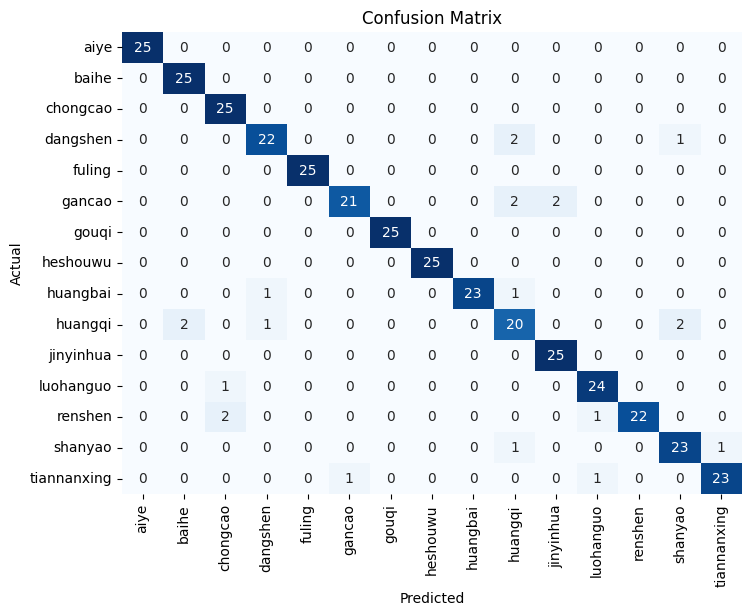

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_generator.classes,y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Export Model

In [ ]:
import tensorflow as tf

# Load the best model
best_model = tf.keras.models.load_model('mobilenetv2_best_model.h5')

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('mobilenetv2_adam_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Retrain for learning rate 0.0001

In [ ]:
# Fine Tuning 3
# Optimizer = RMSprop
# Learing rate = 0.0001

In [8]:
import numpy as np
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define batch size and epochs to train the model
batch_size = 32
epochs = 10

print(f"Training with batch_size={batch_size}, epochs={epochs}")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

9406464/9406464 [==============================] - 1s 0us/step
Training with batch_size=32, epochs=10
Epoch 1/10
93/93 [==============================] - 2145s 23s/step - loss: 1.1638 - accuracy: 0.7049 - val_loss: 0.5713 - val_accuracy: 0.8580
Epoch 2/10
93/93 [==============================] - 58s 617ms/step - loss: 0.4663 - accuracy: 0.8747 - val_loss: 0.3703 - val_accuracy: 0.8977
Epoch 3/10
93/93 [==============================] - 58s 622ms/step - loss: 0.3298 - accuracy: 0.9144 - val_loss: 0.3153 - val_accuracy: 0.9148
Epoch 4/10
93/93 [==============================] - 57s 615ms/step - loss: 0.2687 - accuracy: 0.9212 - val_loss: 0.2638 - val_accuracy: 0.9205
Epoch 5/10
93/93 [==============================] - 58s 619ms/step - loss: 0.2263 - accuracy: 0.9316 - val_loss: 0.2507 - val_accuracy: 0.9176
Epoch 6/10
93/93 [==============================] - 59s 629ms/step - loss: 0.2064 - accuracy: 0.9370 - val_loss: 0.2188 - val_accuracy: 0.9261
Epoch 7/10
93/93 [======================

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy for batch_size={batch_size}, epochs={epochs}: {test_accuracy}")
print(f"Test loss: {test_loss}")

 5/12 [===========>..................] - ETA: 2:53 - loss: 0.2682 - accuracy: 0.9438

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 255s 23s/step - loss: 0.2271 - accuracy: 0.9360
Test accuracy for batch_size=32, epochs=10: 0.9359999895095825
Test loss: 0.22711226344108582


In [10]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Training Loss: [1.1637879610061646, 0.4663355052471161, 0.3298358619213104, 0.2687441408634186, 0.22628605365753174, 0.20642605423927307, 0.17073020339012146, 0.16373060643672943, 0.15536078810691833, 0.13226807117462158]
Training Accuracy: [0.7048517465591431, 0.8746630549430847, 0.914420485496521, 0.921159029006958, 0.9316037893295288, 0.9369946122169495, 0.9464285969734192, 0.9545148015022278, 0.9548517465591431, 0.960579514503479]
Validation Loss: [0.5712546110153198, 0.3703421354293823, 0.3152759373188019, 0.2638128995895386, 0.2507225275039673, 0.2188347429037094, 0.2207571417093277, 0.22518348693847656, 0.18965043127536774, 0.1857115775346756]
Validation Accuracy: [0.8579545617103577, 0.8977272510528564, 0.9147727489471436, 0.9204545617103577, 0.9176136255264282, 0.9261363744735718, 0.9261363744735718, 0.9346590638160706, 0.9403409361839294, 0.9375]


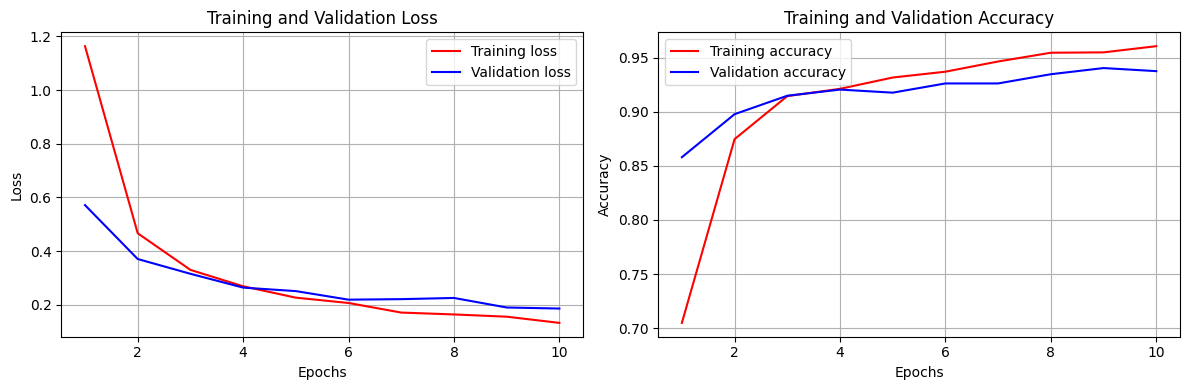

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.metrics import classification_report

# Predict labels using trained model
y_pred_probs = model.predict(test_generator)

# Convert predicted labels from one-hot encoded to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class labels from the data generator
class_labels = test_generator.class_indices

# Get the list of class names in the correct order
class_names = list(class_labels.keys())

# Generate a classification report
report = classification_report(
    test_generator.classes,
    y_pred,
    target_names=class_names
)

# Print the report
print(report)


 6/12 [==============>...............] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 3s 140ms/step
              precision    recall  f1-score   support

        aiye       1.00      1.00      1.00        25
       baihe       0.96      1.00      0.98        25
    chongcao       0.93      1.00      0.96        25
    dangshen       0.83      0.80      0.82        25
      fuling       1.00      0.96      0.98        25
      gancao       0.96      0.88      0.92        25
       gouqi       1.00      1.00      1.00        25
    heshouwu       1.00      1.00      1.00        25
    huangbai       0.96      0.92      0.94        25
     huangqi       0.83      0.80      0.82        25
   jinyinhua       0.93      1.00      0.96        25
   luohanguo       0.92      0.96      0.94        25
     renshen       0.92      0.88      0.90        25
     shanyao       0.83      0.96      0.89        25
 tiannanxing       1.00      0.88      0.94        25

    accuracy                           0.94       375
   macro avg       0.94  

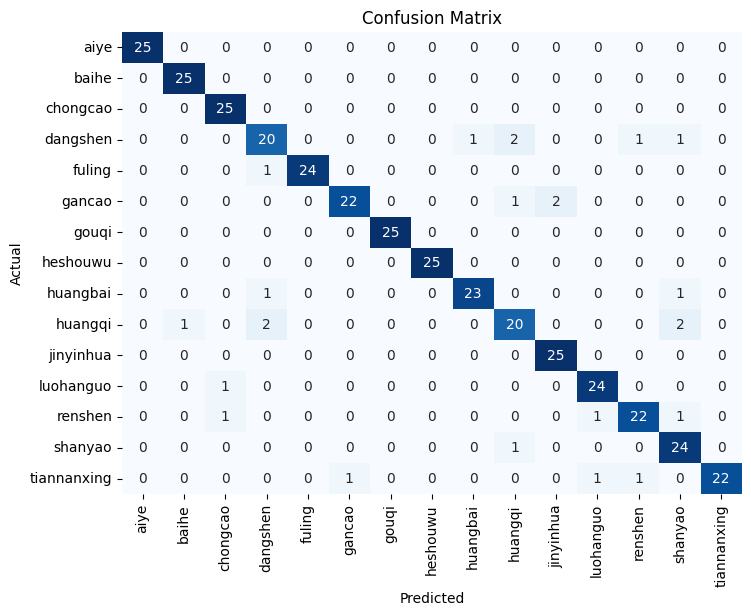

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_generator.classes,y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Fine Tuning 4
# Learning Rate = 0.0001
# Optimizer = RMSprop
# Unfreeze layers

In [14]:
import numpy as np
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last few layers
for layer in base_model.layers[-30:]:
    layer.trainable = True

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define batch size and epochs to train the model
batch_size = 32
epochs = 10

print(f"Training with batch_size={batch_size}, epochs={epochs}")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Training with batch_size=32, epochs=10
Epoch 1/10
93/93 [==============================] - 84s 647ms/step - loss: 0.8133 - accuracy: 0.7800 - val_loss: 0.7871 - val_accuracy: 0.7386
Epoch 2/10
93/93 [==============================] - 59s 634ms/step - loss: 0.2663 - accuracy: 0.9195 - val_loss: 0.6670 - val_accuracy: 0.8153
Epoch 3/10
93/93 [==============================] - 60s 645ms/step - loss: 0.1728 - accuracy: 0.9468 - val_loss: 0.6011 - val_accuracy: 0.8324
Epoch 4/10
93/93 [==============================] - 58s 628ms/step - loss: 0.1482 - accuracy: 0.9542 - val_loss: 0.5361 - val_accuracy: 0.8722
Epoch 5/10
93/93 [==============================] - 59s 637ms/step - loss: 0.1010 - accuracy: 0.9680 - val_loss: 0.5351 - val_accuracy: 0.8693
Epoch 6/10
93/93 [==============================] - 57s 610ms/step - loss: 0.0704 - accuracy: 0.9794 - val_loss: 0.5980 - val_accuracy: 0.8693
Epoch 7/10
93/93 [==============================] - 57s 616ms/step - loss: 0.0872 - accuracy: 0.9727 - 

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy for batch_size={batch_size}, epochs={epochs}: {test_accuracy}")
print(f"Test loss: {test_loss}")

 6/12 [==============>...............] - ETA: 0s - loss: 0.7535 - accuracy: 0.8698

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 2s 154ms/step - loss: 0.6108 - accuracy: 0.8640
Test accuracy for batch_size=32, epochs=10: 0.8640000224113464
Test loss: 0.6108259558677673


In [16]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Training Loss: [0.8133352994918823, 0.26626670360565186, 0.1728275567293167, 0.14817440509796143, 0.10098812729120255, 0.07041405886411667, 0.08720386773347855, 0.06010429933667183, 0.060647156089544296, 0.05801360309123993]
Training Accuracy: [0.7799865007400513, 0.9194744229316711, 0.9467654824256897, 0.9541779160499573, 0.9679918885231018, 0.9794474244117737, 0.9727088809013367, 0.9828166961669922, 0.979784369468689, 0.9784366488456726]
Validation Loss: [0.7870869040489197, 0.6670078039169312, 0.6011324524879456, 0.5360796451568604, 0.5350741744041443, 0.5980104207992554, 0.8377407193183899, 0.6510202288627625, 0.8379262685775757, 0.7739496231079102]
Validation Accuracy: [0.7386363744735718, 0.8153409361839294, 0.8323863744735718, 0.8721590638160706, 0.8693181872367859, 0.8693181872367859, 0.8380681872367859, 0.8835227489471436, 0.8295454382896423, 0.8551136255264282]


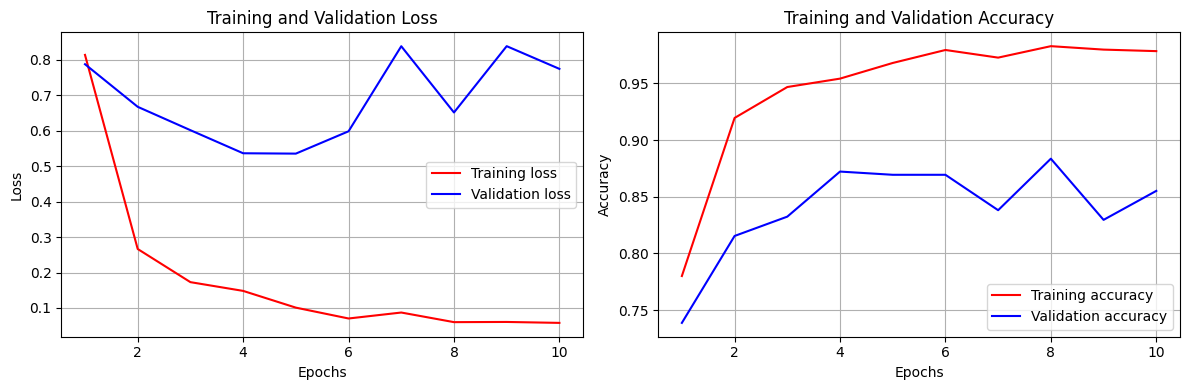

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
from sklearn.metrics import classification_report

# Predict labels using trained model
y_pred_probs = model.predict(test_generator)

# Convert predicted labels from one-hot encoded to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class labels from the data generator
class_labels = test_generator.class_indices

# Get the list of class names in the correct order
class_names = list(class_labels.keys())

# Generate a classification report
report = classification_report(
    test_generator.classes,
    y_pred,
    target_names=class_names
)

# Print the report
print(report)


12/12 [==============================] - 4s 222ms/step
              precision    recall  f1-score   support

        aiye       1.00      0.96      0.98        25
       baihe       1.00      0.92      0.96        25
    chongcao       1.00      0.88      0.94        25
    dangshen       0.63      0.88      0.73        25
      fuling       0.93      1.00      0.96        25
      gancao       1.00      0.44      0.61        25
       gouqi       1.00      0.96      0.98        25
    heshouwu       1.00      0.92      0.96        25
    huangbai       1.00      0.80      0.89        25
     huangqi       0.67      0.80      0.73        25
   jinyinhua       0.81      1.00      0.89        25
   luohanguo       1.00      0.48      0.65        25
     renshen       1.00      0.96      0.98        25
     shanyao       0.89      0.96      0.92        25
 tiannanxing       0.60      1.00      0.75        25

    accuracy                           0.86       375
   macro avg       0.90  

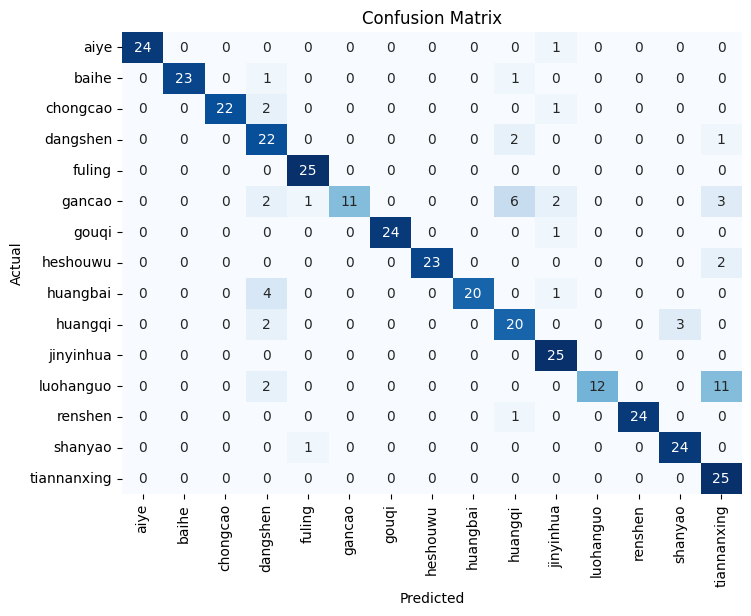

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_generator.classes,y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()